## <span style="color:blue">Ejemplo de implementación de Kennard Stone para la división racional del dataset</span>

# Kennard-Stone method (KS)

The KS method (KENNARD & STONE, 1969) performs the split of the original dataset into two subsets (calibration and validation) in such a way that each one contains samples that can capture the maximum variability of the original set (SOUSA et al., 2011).

This method uses the Euclidean distance for each pair (p, q) of samples to select the samples that will belong to the calibration subset:

$$
d_x(p,q) = \sqrt{\sum_{j=1}^{J} \left( x_p(j) - x_q(j) \right)^2}
$$

where \( p,q \in [1,N] \) and:

- \( J \) represents the number of covariates,
- \( N \) corresponds to the sample size.

In the case of variables being on the same scale, the Euclidean distance will suffice to capture the diversity of the dataset. The KS method ensures that the calibration subset is representative of the entire dataset by maximizing the distance between the points in the subset.


## Cargamos las librerías necesarias. 

In [29]:
## Este ejemplo ayudará a nuestros competidores a aprender algo de QSAR 

import kennard_stone as ks
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Cargamos el dataset de ejemplo y lo dividimos usando Kennard Stone en una porporción 70/30

In [33]:

# Cargamos los datos desde el CSV
data = pd.read_csv(r'C:\Users\quant\Desktop\ejemplo.csv')

# Extraemos la variable independiente 'Tox' y los descriptores moleculares
y = data['Tox'].values.astype('float32')  # Variable independiente
X = data.iloc[:, 2:].values.astype('float32')  # Descriptores moleculares

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = ks.train_test_split(X, y, test_size=0.3)


Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.


## Unimos las respuestas con las variables en ambos sets. 

In [36]:

# Convertimos X_train y y_train a DataFrames
X_train_df = pd.DataFrame(X_train, columns=data.columns[2:])  # Usamos los nombres de columna del dataset original para los descriptores
y_train_df = pd.DataFrame(y_train, columns=['Tox'])  # Creamos un DataFrame para y_train

# Unimos X_train_df con y_train_df
train_df = pd.concat([y_train_df, X_train_df], axis=1)

# Hacemos lo mismo para X_test y y_test
X_test_df = pd.DataFrame(X_test, columns=data.columns[2:])
y_test_df = pd.DataFrame(y_test, columns=['Tox'])
test_df = pd.concat([y_test_df, X_test_df], axis=1)

## Damos un vistazo a nuestro training set. 

In [37]:
train_df

,Tox,MW,AMW,Mv,Mp,Mi,nTA,nBT,RBN,RBF,...,MDEC-13,MDEC-14,MDEC-23,MDEC-24,MDEC-33,MDEC-34,MDEN-12,arLevel2,s3_relPathLength_2,s4_numRotBonds
0,2.156,243.779999,7.170000,0.577121,0.624006,1.157115,5.0,34.0,5.0,0.147059,...,4.263021,0.000000,2.149140,0.000000,2.381102,0.000000,0.000000,0.0,0.000000,0.0
1,3.208,240.729996,8.301035,0.622865,0.653024,1.158435,5.0,29.0,4.0,0.137931,...,2.134136,1.568274,1.639769,0.816497,1.500000,0.944941,0.968096,0.0,0.000000,0.0
2,1.816,255.440002,6.722105,0.566013,0.625458,1.150871,5.0,38.0,6.0,0.157895,...,6.608520,0.000000,1.220898,0.000000,3.395048,0.000000,0.000000,0.0,0.000000,0.0
3,1.884,229.750000,7.411290,0.583719,0.627574,1.158926,4.0,31.0,5.0,0.161290,...,3.099537,0.000000,2.417100,0.000000,2.381102,0.000000,0.000000,1.0,1.000000,3.0
4,2.095,229.750000,7.411290,0.583719,0.627574,1.158926,5.0,31.0,4.0,0.129032,...,2.845515,2.459153,0.944941,0.166667,1.500000,0.944941,0.000000,0.0,0.000000,0.0
5,2.454,213.350006,7.356896,0.583728,0.637352,1.154741,3.0,29.0,5.0,0.172414,...,2.345975,0.000000,1.889882,0.000000,1.500000,0.000000,0.000000,0.0,0.000000,0.0
6,1.100,238.389999,6.112564,0.547251,0.592959,1.161831,5.0,39.0,6.0,0.153846,...,3.556893,2.295783,1.889882,0.333333,1.500000,0.944941,0.000000,0.0,0.000000,0.0
7,2.278,227.729996,7.852758,0.605810,0.644600,1.155569,3.0,30.0,4.0,0.133333,...,2.857381,0.000000,2.857381,0.000000,3.395048,0.000000,0.000000,0.0,0.000000,0.0
8,2.159,211.309998,6.603437,0.561956,0.595356,1.162253,4.0,32.0,5.0,0.156250,...,4.539636,0.000000,1.074570,0.000000,2.381102,0.000000,0.000000,0.0,0.000000,0.0
9,3.068,245.369995,6.631622,0.589043,0.631305,1.145889,5.0,37.0,5.0,0.135135,...,3.638005,3.363586,4.951882,0.812599,1.190551,1.216440,1.000000,0.0,0.500000,3.0


## Iremos en búsqueda de las 4 variables más influyentes utilizando Lasso

In [38]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Escalamos las características porque la regularización es sensible a la escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustamos LassoCV para encontrar el mejor alpha y hacer selección de variables
lasso = LassoCV(cv=5).fit(X_scaled, y)

# Identificamos las variables seleccionadas
coeficientes = np.abs(lasso.coef_)
variables_seleccionadas = np.argsort(coeficientes)[-4:]

print("Variables seleccionadas (índices):", variables_seleccionadas)
print("Nombres de las variables seleccionadas:", data.columns[2:][variables_seleccionadas])


Variables seleccionadas (índices): [731 743 672 644]
Nombres de las variables seleccionadas: Index(['CMC-50', 'MDEC-24', 'SHED_AA', 'CATS2D_06_DL'], dtype='object')


## Gráfica de las variables más importantes. 

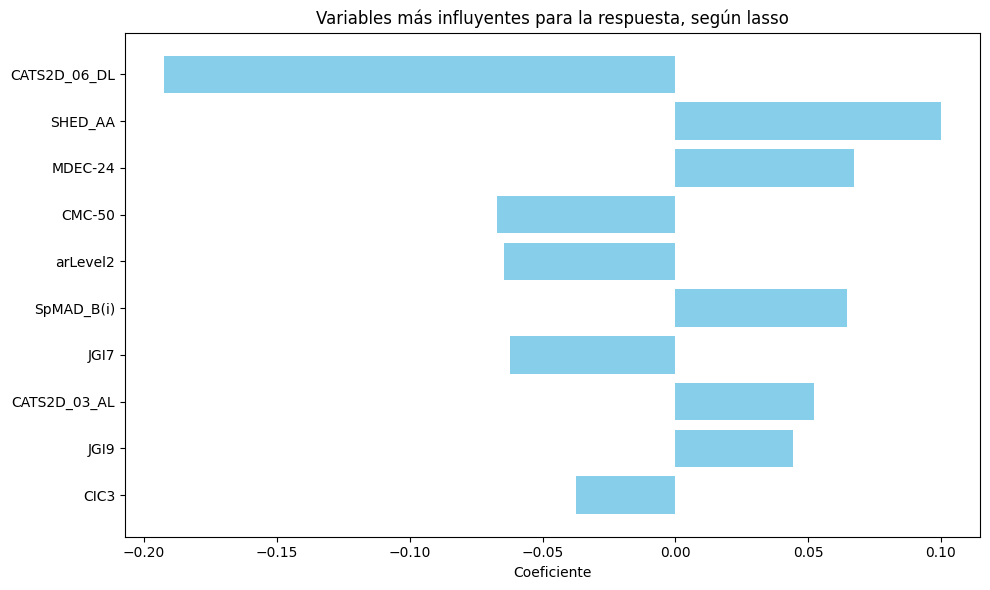

In [41]:
# Ordenamos los coeficientes por su valor absoluto pero mantenemos los índices
indices_ordenados = np.argsort(np.abs(coeficientes))[-10:]

# Seleccionamos solo los 10 coeficientes más grandes y sus etiquetas correspondientes
coeficientes_seleccionados = coeficientes[indices_ordenados]
etiquetas = data.columns[2:][indices_ordenados]  # Asumiendo que tus variables comienzan desde la tercera columna

# Creando el gráfico
plt.figure(figsize=(10, 6))
plt.barh(range(10), coeficientes_seleccionados, color='skyblue')
plt.yticks(range(10), etiquetas)
plt.xlabel('Coeficiente')
plt.title('Variables más influyentes para la respuesta, según lasso')
plt.tight_layout()

plt.show()
